In [24]:
from amm import amm
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
# plt.style.use('paper.mplstyle')

import seaborn as sns
sns.set_theme(style="ticks")

import statsmodels.api as sm
import matplotlib.ticker as mtick
import pickle

In [123]:
T = 120
Rx = 1000.
Ry = 1000.
batch_size = 1_000

kappa = [0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
sigma = [1, 0.3, 0.5, 1.5, 1.75, 2, 2.25]
p = [0.35, 0.3, 0.34, 0.33, 0.32, 0.31, 0.3]
phi = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [124]:
''' Initial reserves '''
Rx0   = np.repeat(Rx, len(kappa))
Ry0   = np.repeat(Ry, len(kappa))

pools = amm(Rx=Rx0, Ry=Ry0, phi=phi)

xs_0 = np.repeat(1., len(kappa))
l = pools.swap_and_mint(xs_0)
end_pools, Rx_t, Ry_t, v_t, event_type_t, event_direction_t = pools.simulate(kappa, p, sigma, T=T, batch_size=batch_size)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 156.61it/s]


In [125]:
x_T = np.array([pool.burn_and_swap(l) for pool in end_pools])
log_ret = np.log(x_T)
Y = pd.DataFrame(log_ret)
Y

,0,1,2,3,4,5,6
0,0.018077,0.022194,0.011539,0.007316,0.023677,0.027484,-0.003502
1,0.028788,0.030008,0.016427,0.027015,0.048862,0.001610,0.003242
2,0.015837,0.017079,0.026886,0.061990,0.027113,0.011217,0.004130
3,0.023989,-0.010880,0.005940,0.022657,0.007748,0.014403,-0.011662
4,0.029360,0.019175,0.017175,0.041803,0.021176,0.009160,0.002713
...,...,...,...,...,...,...,...
995,0.030063,0.014410,0.010613,-0.002230,0.023467,0.018126,0.002927
996,0.034259,0.007543,0.021781,0.030973,0.004611,-0.024948,0.004999
997,0.025112,0.020160,0.014470,0.036886,0.017973,0.465661,-0.006705
998,0.030705,0.035431,0.028534,0.096831,0.049678,0.553621,0.006677


(-0.1, 0.1)

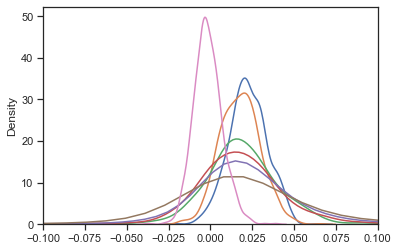

In [126]:
for i in range(log_ret.shape[1]):
    sns.kdeplot(log_ret[:, i])
    
plt.xlim((-0.1, 0.1))

# Portfolio optimization

In [127]:
import riskfolio as rp
import pandas as pd

In [136]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'CVaR' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,0,1,2,3,4,5,6
weights,0.669463,0.224431,0.036633,0.064455,1.103611e-15,0.005018,1.093178e-17
